In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('spam_msg_dataset.csv', encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
# data cleaning
# EDA
# Text Preprocessing
# Model Building
# Evaluation
# Improvement
# Website
# Deployement

# Step 1: Data Cleaning

In [ ]:
df1 = df.copy()
df1

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df1.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
df1.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [ ]:
df1.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df1.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [ ]:
df1.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['target'] = le.fit_transform(df1['target'])


In [ ]:
df1.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Missing Values
df1.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
# Duplicate Values
df1.duplicated().sum()

np.int64(403)

In [ ]:
df1.drop_duplicates(keep='first', inplace=True)

In [ ]:
df1.duplicated().sum()

np.int64(0)

In [ ]:
df1.shape

(5169, 2)

# Step 2: EDA

In [ ]:
df1

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


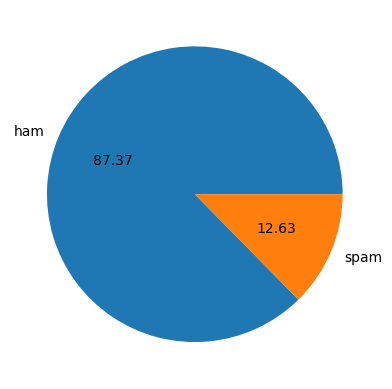

In [ ]:
plt.pie(df1['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f', )
plt.show()

In [ ]:
# Data is imbalanced

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Arcz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Arcz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# number of characters in text
df1['num_characters'] = df1['text'].apply(len)

In [ ]:
df1.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# number of words in text
df1['num_words'] = df1['text'].apply(lambda x: len(nltk.word_tokenize(x))) # word toeknize breaks down the text by word\
df1.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
# number of sentences in text
df1['num_sentences'] = df1['text'].apply(lambda x: len(nltk.sent_tokenize(x))) # sent tokenize breaks down the words based on sentences
df1.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df1[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df1[df1['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df1[df1['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

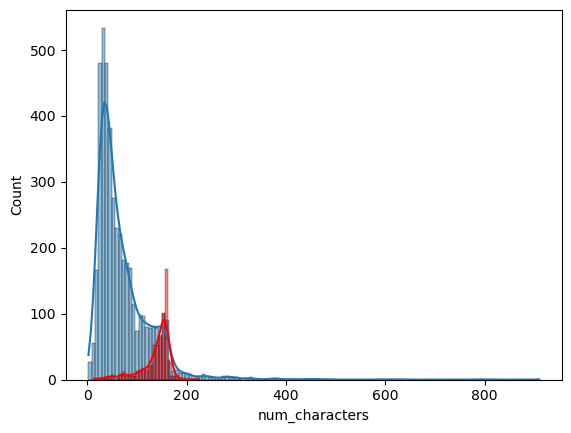

In [ ]:
plt.Figure(figsize=(12, 6))
sns.histplot(df1[df1['target'] == 0]['num_characters'], kde= True)
sns.histplot(df1[df1['target'] == 1]['num_characters'], kde=True, color='red')

<Axes: xlabel='num_words', ylabel='Count'>

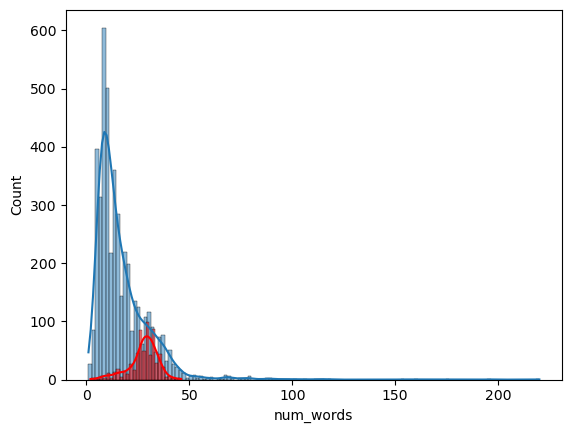

In [ ]:
plt.Figure(figsize=(12, 6))
sns.histplot(df1[df1['target'] == 0]['num_words'], kde= True)
sns.histplot(df1[df1['target'] == 1]['num_words'], kde=True, color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

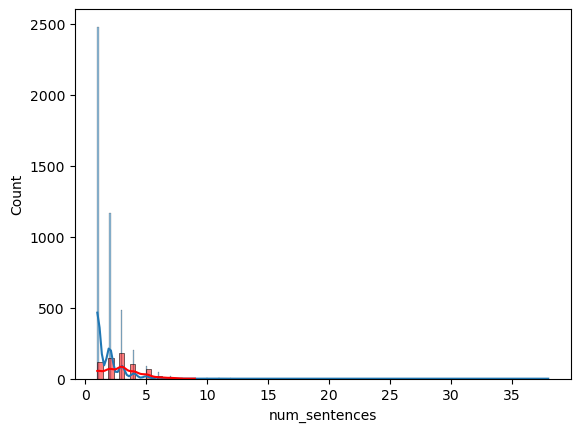

In [ ]:
plt.Figure(figsize=(12, 6))
sns.histplot(df1[df1['target'] == 0]['num_sentences'], kde= True)
sns.histplot(df1[df1['target'] == 1]['num_sentences'], kde=True, color='red')

<Axes: >

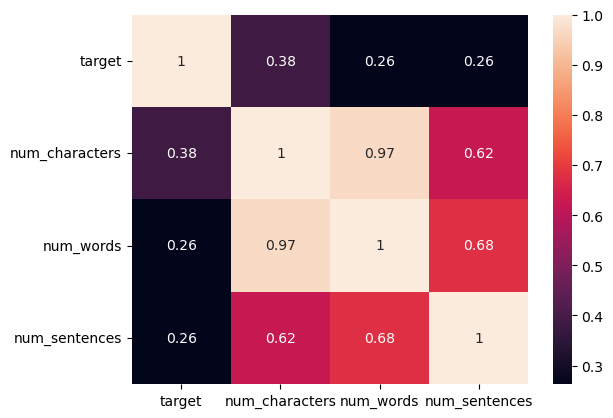

In [ ]:
sns.heatmap(df1.corr(numeric_only=True), annot=True)

# Step 3: Data Preprocessing
- Lower Case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [ ]:
from nltk.corpus import stopwords
import string
# nltk.download('stopwords')
# stopwords.words('english')
# string.punctuation()

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []

    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:] # : COLON IS INMPORTANT TO PUT HERE BECAUSE STRING IS A MUTABLE DATATYPE AND WHENEVER YOU'LL THE "TEXT" BE COPYING IT 
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('')

''

In [ ]:
df1['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [103]:
df1['transformed_text'] = df1['text'].apply(transform_text)
df1

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [104]:
from wordcloud import WordCloud

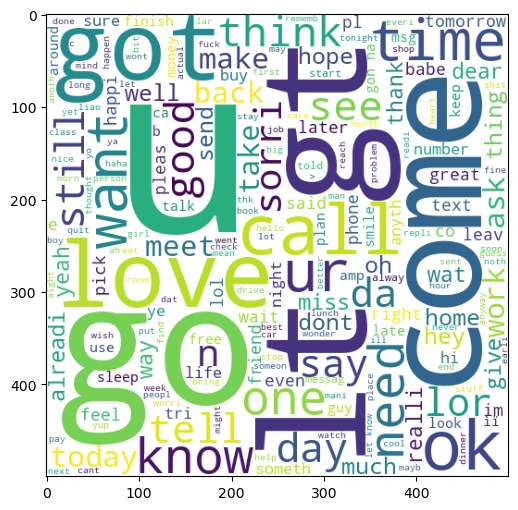

In [105]:
wc = WordCloud(width= 500, height= 500, min_font_size= 10, background_color= 'white')
spam_wc = wc.generate(df1[df1['target'] == 0]['transformed_text'].str.cat(sep= " "))

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

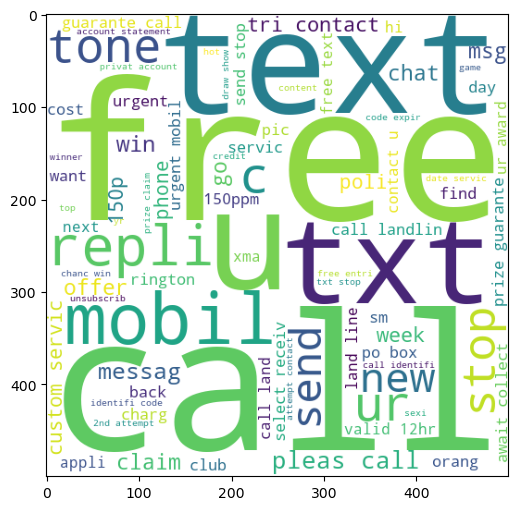

In [106]:
ham_wc = wc.generate(df1[df1['target'] == 1]['transformed_text'].str.cat(sep= " "))

plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [107]:
spam_corpus = []
for msg in df1[df1['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [108]:
len(spam_corpus)

9939

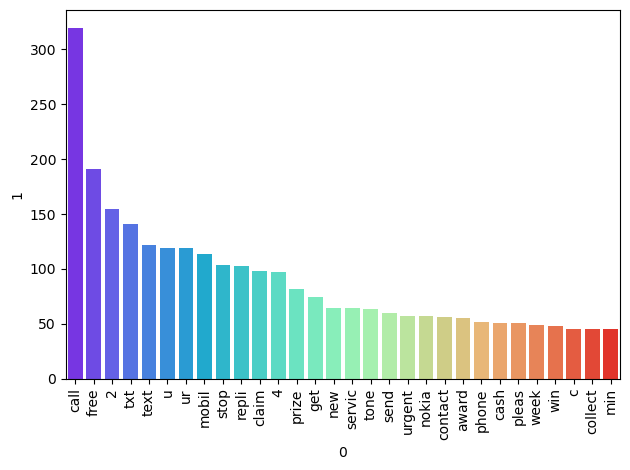

In [109]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1], palette='rainbow') # gives top 30 most common words
plt.xticks(rotation= 'vertical')
plt.tight_layout()

In [110]:
ham_corpus = []
for msg in df1[df1['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

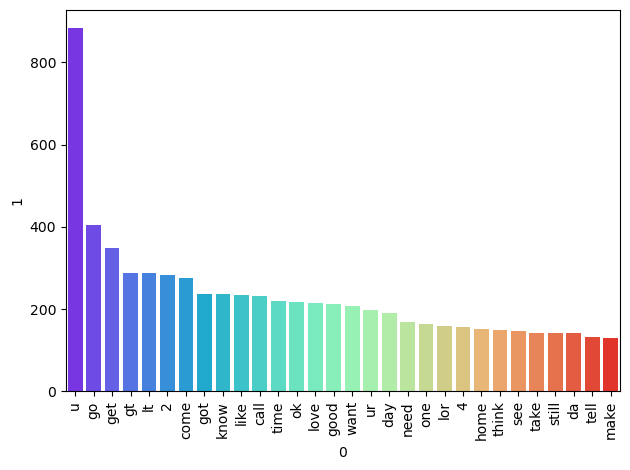

In [111]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1], palette='rainbow') # gives top 30 most common words
plt.xticks(rotation= 'vertical')
plt.tight_layout()

In [112]:
len(ham_corpus)

35404

# Step 4: Model Building

In [113]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
tfidf = TfidfVectorizer(max_features=3000)
cv = CountVectorizer()

In [114]:
x_cv = cv.fit_transform(df1['transformed_text']).toarray()
x_tfidf = tfidf.fit_transform(df1['transformed_text']).toarray()
x = scaler.fit_transform(x_tfidf)

In [115]:
y = df1['target'].values

In [116]:
# Appending the number of characters to col:
x_numchar = np.hstack((x_tfidf, df1['num_characters'].values.reshape(-1, 1)))

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x_cv, y, test_size=0.2, random_state=2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_tfidf, y, test_size=0.2, random_state=2)
X_train3, X_test3, y_train3, y_test3 = train_test_split(x_numchar, y, test_size=0.2, random_state=2)


In [119]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [143]:
model = mnb.fit(X_train2, y_train2)

In [145]:
ypred = model.predict(X_test2)
accuracy_score(ypred, y_test2)
print(precision_score(ypred, y_test2))

0.782608695652174


In [120]:
# in this situation, the data is pretty much imbalanced so accuracy score is not a very reliable measure so here we'll consider precisoin score more than accuracy score.
# WE'LL SELECT "MultinomialNB MODEL --> TFIDF" 

# Now after this we'll be trying different more models because we won't rely on only one type of models

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier



In [122]:
svc = SVC(kernel='sigmoid', gamma=1.0)
lr = LogisticRegression(solver='liblinear', penalty='l1')
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
mnb = MultinomialNB()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bgc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimator = 50, random_state = 2)


In [123]:
clfs = {
    'GNB': gnb,
    'MNB': mnb,
    'BNB': bnb,
    'SVC': svc,
    'LR': lr,
    'KNN': knn,
    'DT': dtc,
    'RFC': rfc,
    'ABC': abc,
    'BGC': bgc,
    'ETC': etc,
    'GBC': gbc,
    'XGB': xgb
}

In [124]:
def train_classifier(clfs, xtrain, xtest, ytrain, ytest):
    clfs.fit(xtrain, ytrain)
    ypred = clfs.predict(xtest)
    accuracy = accuracy_score(ytest, ypred)
    precision = precision_score(ytest, ypred)

    return accuracy, precision

In [125]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    
    current_accuracy, current_precision = train_classifier(clf, X_train2, X_test2, y_train2, y_test2)

    print("for: ", name)
    print("Accuracy Score: ", current_accuracy)
    print("Precision Score: ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
 

for:  GNB
Accuracy Score:  0.8694390715667312
Precision Score:  0.5068493150684932
for:  MNB
Accuracy Score:  0.9709864603481625
Precision Score:  1.0
for:  BNB
Accuracy Score:  0.9835589941972921
Precision Score:  0.991869918699187
for:  SVC
Accuracy Score:  0.9758220502901354
Precision Score:  0.9747899159663865
for:  LR
Accuracy Score:  0.9584139264990329
Precision Score:  0.9702970297029703
for:  KNN
Accuracy Score:  0.9052224371373307
Precision Score:  1.0
for:  DT
Accuracy Score:  0.9323017408123792
Precision Score:  0.8333333333333334
for:  RFC
Accuracy Score:  0.9758220502901354
Precision Score:  0.9829059829059829
for:  ABC
Accuracy Score:  0.9245647969052224
Precision Score:  0.8488372093023255
for:  BGC
Accuracy Score:  0.9584139264990329
Precision Score:  0.8682170542635659
for:  ETC
Accuracy Score:  0.9748549323017408
Precision Score:  0.9745762711864406
for:  GBC
Accuracy Score:  0.9468085106382979
Precision Score:  0.9191919191919192
for:  XGB
Accuracy Score:  0.97098646

In [126]:
performance_df= pd.DataFrame({'Algorithms': clfs.keys(), 'Accuracy Score': accuracy_scores, 'Precision Score': precision_scores}).sort_values(ascending=False, by='Precision Score')

In [127]:
performance_df # tfidf is default 

,Algorithms,Accuracy Score,Precision Score
1,MNB,0.970986,1.000000
5,KNN,0.905222,1.000000
2,BNB,0.983559,0.991870
7,RFC,0.975822,0.982906
3,SVC,0.975822,0.974790
10,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
12,XGB,0.970986,0.950000
11,GBC,0.946809,0.919192
9,BGC,0.958414,0.868217


In [128]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithms")
performance_df1

,Algorithms,variable,value
0,MNB,Accuracy Score,0.970986
1,KNN,Accuracy Score,0.905222
2,BNB,Accuracy Score,0.983559
3,RFC,Accuracy Score,0.975822
4,SVC,Accuracy Score,0.975822
5,ETC,Accuracy Score,0.974855
6,LR,Accuracy Score,0.958414
7,XGB,Accuracy Score,0.970986
8,GBC,Accuracy Score,0.946809
9,BGC,Accuracy Score,0.958414


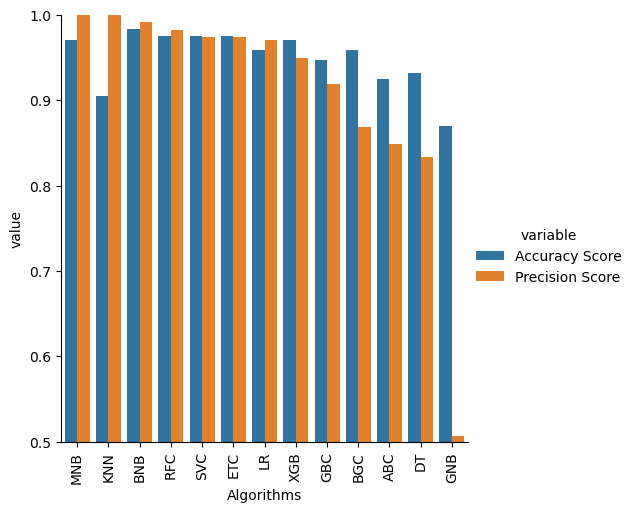

In [129]:
sns.catplot(x= 'Algorithms', y= 'value', hue='variable', data=performance_df1, kind='bar',  height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation= 'vertical')
plt.show()

# Model Improvement

1. Change the max_features parameter of tfidf

In [130]:
# temp_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_score_max_features_3000': accuracy_scores, 'Precision_score_max_features_3000': precision_scores}).sort_values(ascending=False, by='Precision_score_max_features_3000')

In [131]:
temp_df # max_features = 3000 of tfidf

NameError: name 'temp_df' is not defined

In [ ]:
# temp_df1 = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_scaling': accuracy_scores, 'Precision_scaling': precision_scores}).sort_values(ascending=False, by='Precision_scaling')

In [ ]:
temp_df1

,Algorithm,Accuracy_scaling,Precision_scaling
2,BNB,0.983559,0.991870
7,RFC,0.975822,0.982906
5,KNN,0.905222,0.976190
10,ETC,0.974855,0.974576
4,LR,0.967118,0.964286
12,XGB,0.970986,0.950000
1,MNB,0.978723,0.946154
3,SVC,0.969052,0.927419
11,GBC,0.946809,0.919192
9,BGC,0.958414,0.868217


In [ ]:
# performance_df.rename(columns={'Algorithms': 'Algorithm'}, inplace=True)

In [ ]:
new_df = performance_df.merge(temp_df, on='Algorithm')
new_df_scaled = new_df.merge(temp_df1, on='Algorithm')
new_df_scaled

,Algorithm,Accuracy Score,Precision Score,Accuracy_score_max_features_3000,Precision_score_max_features_3000,Accuracy_scaling,Precision_scaling
0,MNB,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154
1,KNN,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190
2,RFC,0.971954,1.000000,0.975822,0.982906,0.975822,0.982906
3,ETC,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790,0.969052,0.927419
5,BNB,0.970019,0.973451,0.983559,0.991870,0.983559,0.991870
6,LR,0.951644,0.940000,0.958414,0.970297,0.967118,0.964286
7,XGB,0.972921,0.929688,0.970986,0.950000,0.970986,0.950000
8,GBC,0.952611,0.923810,0.946809,0.919192,0.946809,0.919192
9,BGC,0.958414,0.862595,0.958414,0.868217,0.958414,0.868217


In [ ]:
temp_df2 = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_score_num_characters': accuracy_scores, 'precision_score_num_characters': precision_scores}).sort_values(ascending=False, by='precision_score_num_characters')

In [ ]:
temp_df2

,Algorithm,Accuracy_score_num_characters,precision_score_num_characters
1,MNB,0.941006,1.000000
2,BNB,0.983559,0.991870
7,RFC,0.969052,0.981818
10,ETC,0.978723,0.975410
12,XGB,0.971954,0.965812
4,LR,0.961315,0.962264
11,GBC,0.950677,0.930693
8,ABC,0.946809,0.902913
9,BGC,0.966151,0.899225
6,DT,0.944874,0.885714


In [ ]:
new_df_scaled = new_df_scaled.merge(temp_df2, on='Algorithm')

In [ ]:
new_df_scaled

,Algorithm,Accuracy Score,Precision Score,Accuracy_score_max_features_3000,Precision_score_max_features_3000,Accuracy_scaling,Precision_scaling,Accuracy_score_num_characters,precision_score_num_characters
0,MNB,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154,0.941006,1.000000
1,KNN,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190,0.933269,0.822430
2,RFC,0.971954,1.000000,0.975822,0.982906,0.975822,0.982906,0.969052,0.981818
3,ETC,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576,0.978723,0.975410
4,SVC,0.972921,0.974138,0.975822,0.974790,0.969052,0.927419,0.866538,0.000000
5,BNB,0.970019,0.973451,0.983559,0.991870,0.983559,0.991870,0.983559,0.991870
6,LR,0.951644,0.940000,0.958414,0.970297,0.967118,0.964286,0.961315,0.962264
7,XGB,0.972921,0.929688,0.970986,0.950000,0.970986,0.950000,0.971954,0.965812
8,GBC,0.952611,0.923810,0.946809,0.919192,0.946809,0.919192,0.950677,0.930693
9,BGC,0.958414,0.862595,0.958414,0.868217,0.958414,0.868217,0.966151,0.899225


In [132]:
# Voting Classifier

from sklearn.ensemble import VotingClassifier

mnb = MultinomialNB()
knn = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)


In [133]:
voting = VotingClassifier(estimators=[('mnb', mnb), ('knn', knn), ('rfc', rfc), ('etc', etc), ('svc', svc)], voting= 'soft')

In [134]:
model1_voting = voting.fit(X_train2, y_train2)

In [135]:
y_pred_voting2 = model1_voting.predict(X_test2)
print("Accuracy Score of Voting Model w.r.t x_tfidf is: ", accuracy_score(y_test2, y_pred_voting2))
print("Precision Score of Voting Model w.r.t x_tfidf is: ", precision_score(y_test2, y_pred_voting2))

Accuracy Score of Voting Model w.r.t x_tfidf is:  0.97678916827853
Precision Score of Voting Model w.r.t x_tfidf is:  1.0


In [ ]:
model2_voting = voting.fit(X_train3, y_train3)

In [ ]:
y_pred_voting3 = model2_voting.predict(X_test3)
print("Accuracy Score of Voting Model w.r.t x_numchar is: ", accuracy_score(y_test3, y_pred_voting3))
print("Precision Score of Voting Model w.r.t x_numchar is: ", precision_score(y_test3, y_pred_voting3))

Accuracy Score of Voting Model w.r.t x_numchar is:  0.9564796905222437
Precision Score of Voting Model w.r.t x_numchar is:  1.0


In [136]:
# applying stacking
from sklearn.ensemble import StackingClassifier

estimators = [('svc', svc), ('mnb', mnb), ('etc', etc)]
final_estimator = RandomForestClassifier()

In [137]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [138]:
stacking_clf1 = clf.fit(X_train2, y_train2)

In [139]:
y_pred_stacking_clf = stacking_clf1.predict(X_test2)
print("Accuracy Score of Stacking Classifier Model w.r.t x_tfidf is: ", accuracy_score(y_pred_stacking_clf, y_test2))
print("Precision Score of Stacking Classifier Model w.r.t x_tfidf is: ", accuracy_score(y_pred_stacking_clf, y_test2))

Accuracy Score of Stacking Classifier Model w.r.t x_tfidf is:  0.9806576402321083
Precision Score of Stacking Classifier Model w.r.t x_tfidf is:  0.9806576402321083


In [148]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))